In [1]:
pip install statsmodels

In [3]:
pip install wquantiles

In [41]:
import pandas as pd
import numpy as np
from scipy.stats import trim_mean
from statsmodels import robust
import wquantiles
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
estados=pd.read_csv("/content/state .csv")
#ver los 5 primeros registros
estados.head()

,State,Population,Murder.Rate,Abbreviation
0,Alabama,4779736,5.7,AL
1,Alaska,710231,5.6,AK
2,Arizona,6392017,4.7,AZ
3,Arkansas,2915918,5.6,AR
4,California,37253956,4.4,CA


In [10]:
estados.tail(5)

,State,Population,Murder.Rate,Abbreviation
45,Virginia,8001024,4.1,VA
46,Washington,6724540,2.5,WA
47,West Virginia,1852994,4.0,WV
48,Wisconsin,5686986,2.9,WI
49,Wyoming,563626,2.7,WY


In [13]:
estados.sample(5)

,State,Population,Murder.Rate,Abbreviation
3,Arkansas,2915918,5.6,AR
20,Massachusetts,6547629,2.0,MA
23,Mississippi,2967297,8.6,MS
33,North Dakota,672591,3.0,ND
11,Idaho,1567582,2.0,ID


In [21]:
estados.describe() #saca medidas de tendencia central pero feitos

,Population,Murder.Rate
count,5.000000e+01,50.000000
mean,6.162876e+06,4.066000
std,6.848235e+06,1.915736
min,5.636260e+05,0.900000
25%,1.833004e+06,2.425000
50%,4.436370e+06,4.000000
75%,6.680312e+06,5.550000
max,3.725396e+07,10.300000


#**Overview de los datos **

In [23]:
estados.columns

Index(['State', 'Population', 'Murder.Rate', 'Abbreviation'], dtype='object')

In [18]:
estados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   State         50 non-null     object 
 1   Population    50 non-null     int64  
 2   Murder.Rate   50 non-null     float64
 3   Abbreviation  50 non-null     object 
dtypes: float64(1), int64(1), object(2)
memory usage: 1.7+ KB


#**Estimar tasas de poblacion y Asesinatos**

In [22]:
estados.columns

Index(['State', 'Population', 'Murder.Rate', 'Abbreviation'], dtype='object')

In [28]:
estados["Population"].mean()

np.float64(6162876.3)

In [29]:
estados["Population"].median()

4436369.5

In [31]:
trim_mean(estados.Population,0.1)

np.float64(4783697.125)

In [37]:
#Media ponderada de los asesinatos
estados["Murder.Rate"].mean()

np.float64(4.066)

In [42]:
np.average(estados["Murder.Rate"],weights=estados["Population"])

np.float64(4.445833981123393)

In [45]:
#Mediana ponderada de los asesinatos
wquantiles.median(estados["Murder.Rate"],weights=estados.Population)

np.float64(4.4)

<Axes: >

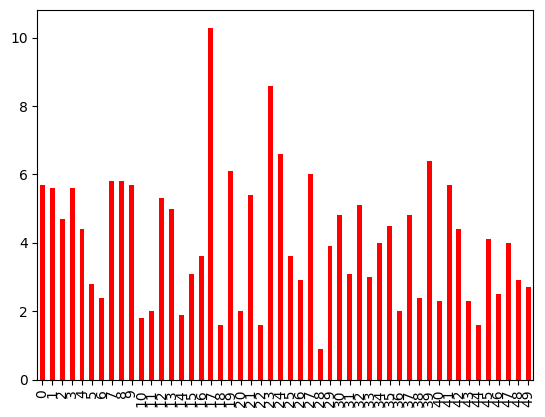

In [46]:
estados["Murder.Rate"].plot.bar(color="Red")

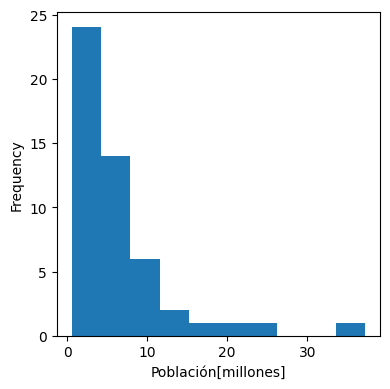

In [50]:
ax=(estados.Population/1_000_000).plot.hist(figsize=(4,4))
ax.set_xlabel("Población[millones]")
plt.tight_layout()
plt.show()

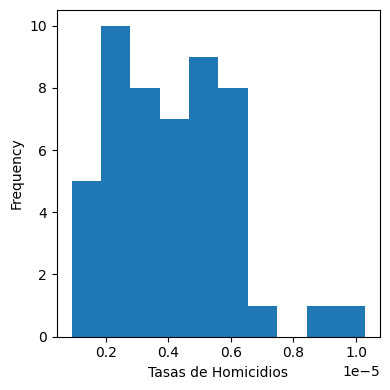

In [53]:
ax=(estados["Murder.Rate"]/1_000_000).plot.hist(figsize=(4,4))
ax.set_xlabel("Tasas de Homicidios")
plt.tight_layout()
plt.show()

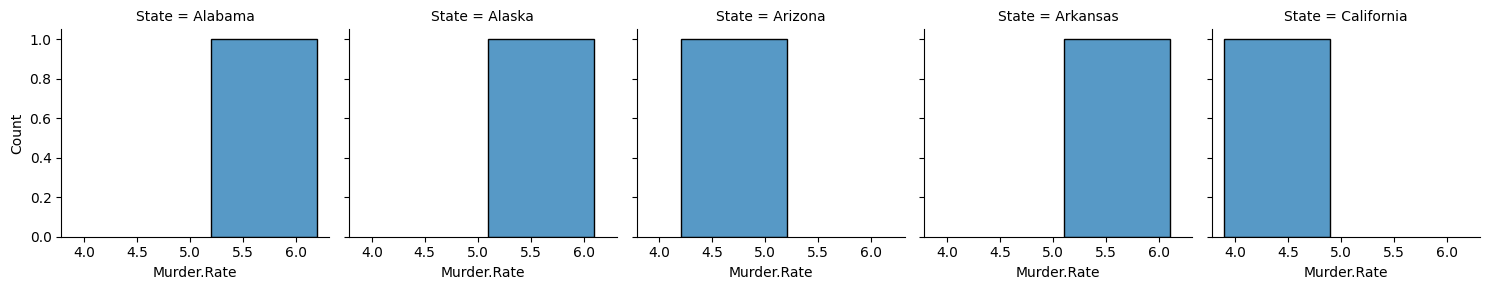

In [57]:
analysis=estados.head()
g=sns.FacetGrid(analysis,col="State")
g.map(sns.histplot,"Murder.Rate")

QUE NO SEAN DATOS NULOS PARA LA TAREA